# Problem Statement-
---
**Overview:** This case requires trainees to develop a customer segmentation to define marketing strategy. The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

---
**Expectations from the candidate:**
- Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:
   * Monthly average purchase and cash advance amount
   * Purchases by type (one-off, installments)
   * Average amount per purchase and cash advance transaction,
   * Limit usage (balance to credit limit ratio),
   * Payments to minimum payments ratio etc (think of more types of similar analysis)
- Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.
- Identification of the relationships/ affinities between services.
- Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm to reveal the behavioral segments of credit card holders
- Identify cluster characteristics of the cluster using detailed profiling.
- Provide the strategic insights and implementation of strategies for given set of cluster characteristics


---
**Data Dictionary:**
- CUST_ID: Credit card holder ID
- BALANCE: Monthly average balance (based on daily balance averages)
- BALANCE_FREQUENCY: Ratio of last 12 months with balance
- PURCHASES: Total purchase amount spent during last 12 months
- ONEOFF_PURCHASES: Total amount of one-off purchases
- INSTALLMENTS_PURCHASES: Total amount of installment purchases
- CASH_ADVANCE: Total cash-advance amount
- PURCHASES_ FREQUENCY: Frequency of purchases (Percent of months with at least one purchase)
- ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases
- CASH_ADVANCE_ FREQUENCY: Cash-Advance frequency
- AVERAGE_PURCHASE_TRX: Average amount per purchase transaction
- CASH_ADVANCE_TRX: Average amount per cash-advance transaction
- PURCHASES_TRX: Average amount per purchase transaction
- CREDIT_LIMIT: Credit limit
- PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period
- MINIMUM_PAYMENTS: Total minimum payments due in the period.
- PRC_FULL_PAYMENTS: Percentage of months with full payment of the due statement balance
- TENURE: Number of months as a customer
---

# A. Exploratory Data Analysis
---
Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

---
Loading data and reading the data into dataframe

In [2]:
credit= pd.read_csv("Data for Associate DS.csv")

---
Basic information about the data set

In [3]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
credit.shape

(8950, 18)

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

---
Removing the column "CUST_ID", since it contains unique values and is not necessary for further analysis.

In [6]:
credit.drop("CUST_ID", axis=1, inplace=True)

In [7]:
# Intital descriptive analysis of data.
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# Find the total number of missing values in the dataframe
print("Total number of missing values: ", credit.isnull().sum().values.sum())

# Find the variables which contain those missing values
credit.isnull().sum()

Total number of missing values:  314


BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

---

### Treatment for missing observations

In [9]:
credit.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [10]:
# Both the variables CREDIT_LIMIT  and MINIMUM_PAYMENTS have missing values.
# Replacing those values with the means.

credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].mean(),inplace=True)
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [11]:
# Checking for missing values once more.
credit.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [12]:
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


---
#### A Quick Graphical Visualization of the Variables

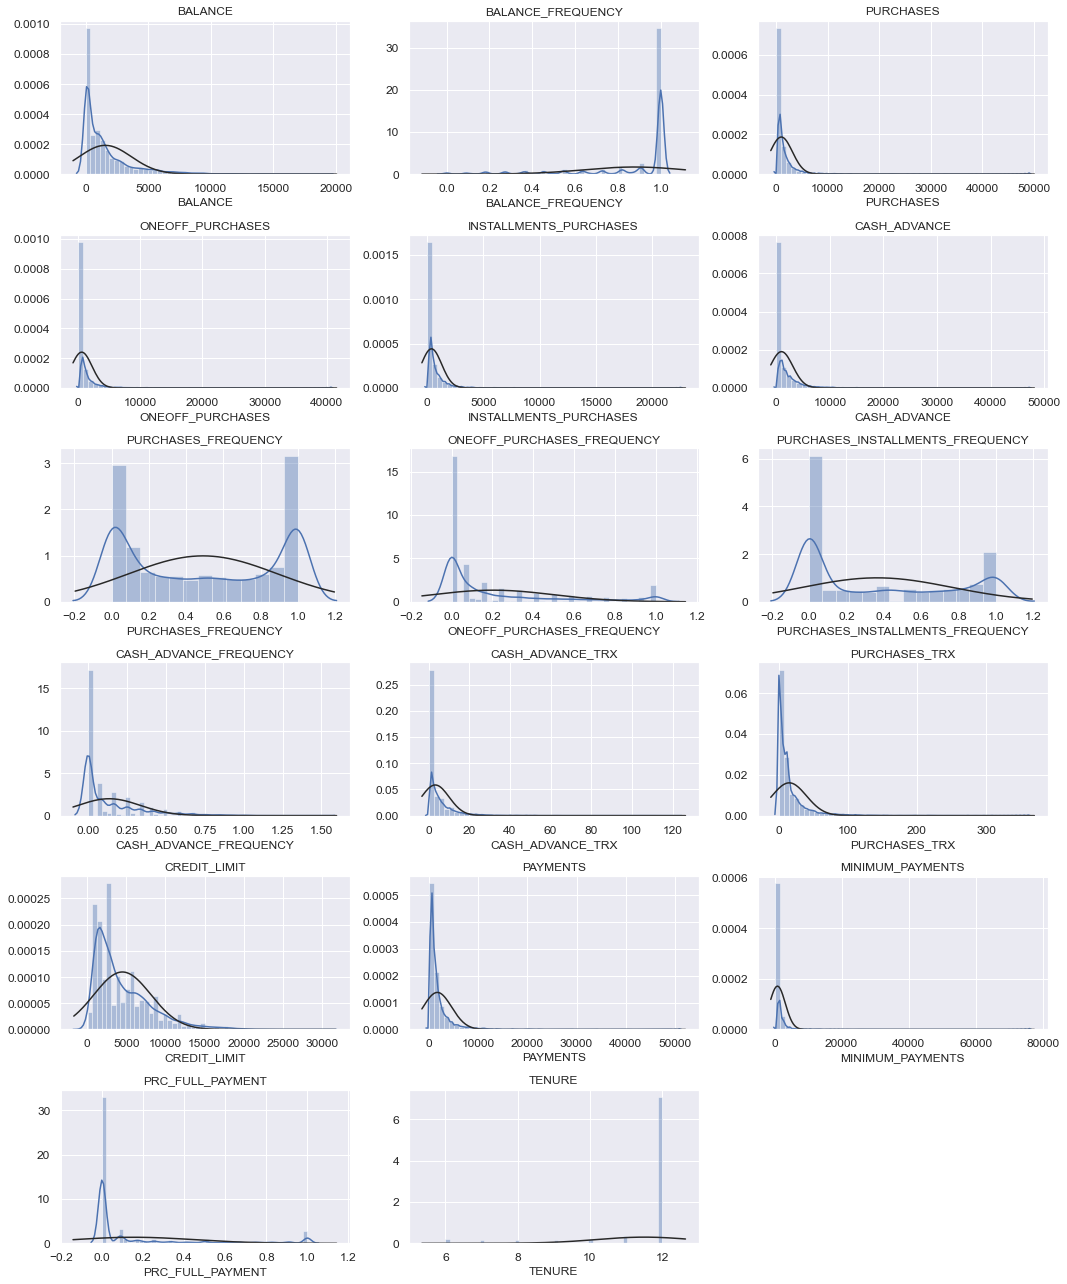

In [13]:
variables = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
plt.figure(figsize=(15,18))

for i in range(0,17):
    plt.subplot(6,3,i+1)
    sns.distplot(credit[variables[i]].dropna(),fit=norm)
    plt.title(variables[i])

plt.tight_layout()

---
Histograms for all the Frequency variables

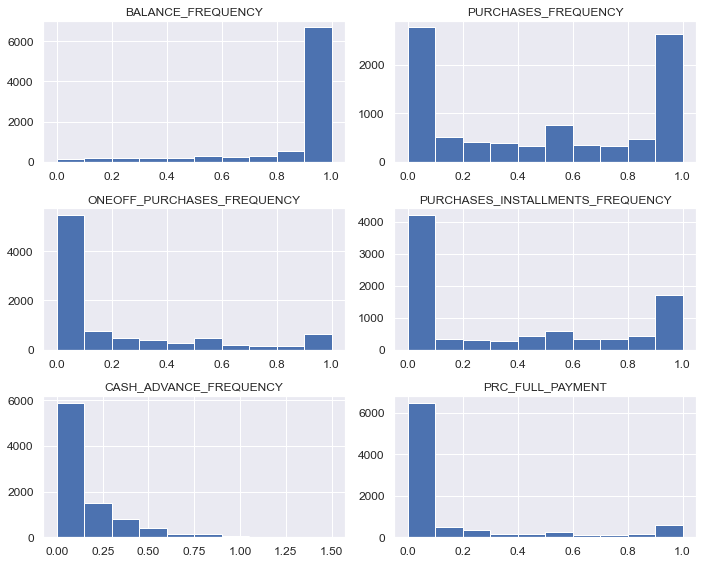

In [14]:
credit[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].hist(figsize=(10,8))
plt.tight_layout()

---
# B. Deriving New KPIs

***1. Monthly Average Purchase***

In [15]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']
print(credit['Monthly_avg_purchase'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64


***2. Monthly Cash Advance***

In [16]:
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']
print(credit['Monthly_cash_advance'].head())

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64


***3. Average Amount Per Purchase***

In [17]:
credit['Avg_amount_per_purchase'] = credit['PURCHASES']/credit['PURCHASES_TRX']
print(credit['Avg_amount_per_purchase'])

0         47.700000
1               NaN
2         64.430833
3       1499.000000
4         16.000000
           ...     
8945      48.520000
8946      50.000000
8947      28.880000
8948            NaN
8949      47.532609
Name: Avg_amount_per_purchase, Length: 8950, dtype: float64


In [18]:
print("Presence of NaN values-", credit['Avg_amount_per_purchase'].isnull().values.any())
print("Presence of inf values-", (credit['Avg_amount_per_purchase'] == inf).any())

Presence of NaN values- True
Presence of inf values- True


---
- Replacing "NaN" and "inf" values with 0

In [19]:
credit[credit['Avg_amount_per_purchase']==inf] = 0
credit['Avg_amount_per_purchase'] = credit['Avg_amount_per_purchase'].fillna(0)
print(credit['Avg_amount_per_purchase'])

0         47.700000
1          0.000000
2         64.430833
3       1499.000000
4         16.000000
           ...     
8945      48.520000
8946      50.000000
8947      28.880000
8948       0.000000
8949      47.532609
Name: Avg_amount_per_purchase, Length: 8950, dtype: float64


***4. Average Cash Advance Amount***

In [20]:
credit['Avg_cash_advance_amount'] = credit['CASH_ADVANCE']/credit['CASH_ADVANCE_TRX']
print(credit['Avg_cash_advance_amount'])

0               NaN
1       1610.736371
2               NaN
3        205.788017
4               NaN
           ...     
8945            NaN
8946            NaN
8947            NaN
8948      18.279389
8949      63.520004
Name: Avg_cash_advance_amount, Length: 8950, dtype: float64


In [21]:
print("Presence of NaN values-", credit['Avg_cash_advance_amount'].isnull().values.any())
print("Presence of inf values-", (credit['Avg_cash_advance_amount'] == inf).any())

Presence of NaN values- True
Presence of inf values- False


---
- Replacing "NaN" values with 0

In [22]:
credit['Avg_cash_advance_amount'] = credit['Avg_cash_advance_amount'].fillna(0)
print(credit['Avg_cash_advance_amount'])

0          0.000000
1       1610.736371
2          0.000000
3        205.788017
4          0.000000
           ...     
8945       0.000000
8946       0.000000
8947       0.000000
8948      18.279389
8949      63.520004
Name: Avg_cash_advance_amount, Length: 8950, dtype: float64


***5. Purchases by Type(One-off, Installments)***

In [23]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [24]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2045, 21)

In [25]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 21)

In [26]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1873, 21)

In [27]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2258, 21)

Clearly, there are 4 types of purchase behaviour in the data set. Hence, we need to define a categorical variable indicating those 4 types of behaviour.

In [28]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        purchase_type = "none"
        return purchase_type
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
        purchase_type = 'oneoff_installment_purchase'
        return purchase_type
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        purchase_type = 'oneoff_purchase'
        return purchase_type
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        purchase_type = 'installment_purchase'
        return purchase_type

In [29]:
credit['purchase_type'] = credit.apply(purchase,axis=1)

In [30]:
credit['purchase_type'].value_counts()

oneoff_installment_purchase    2774
installment_purchase           2258
none                           2045
oneoff_purchase                1873
Name: purchase_type, dtype: int64

***6. Limit Usage (balance to credit limit ratio )***
   - Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [31]:
credit['limit_usage'] = credit['BALANCE']/credit['CREDIT_LIMIT']

In [32]:
# Checking for NaN values
print("Presence of NaN values-", credit['limit_usage'].isnull().values.any())

Presence of NaN values- True


---
- Replacing "NaN" values with 0

In [33]:
credit['limit_usage'] = credit['limit_usage'].fillna(0)

print(credit['limit_usage'])

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8945    0.028494
8946    0.019183
8947    0.023399
8948    0.026915
8949    0.310590
Name: limit_usage, Length: 8950, dtype: float64


***7. Payments to Minimum Payments ratio***

In [34]:
credit['payment_to_minpay'] = credit['PAYMENTS']/credit['MINIMUM_PAYMENTS']

In [35]:
# Checking for NaN values
print("Presence of NaN values-", credit['payment_to_minpay'].isnull().values.any())

Presence of NaN values- True


---
- Replacing "NaN" values with 0

In [36]:
credit['payment_to_minpay'] = credit['payment_to_minpay'].fillna(0)
print(credit['payment_to_minpay'])

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.319208
8947    0.986076
8948    0.942505
8949    0.715439
Name: payment_to_minpay, Length: 8950, dtype: float64


---
### Checking for Outliers and treatment

In [37]:
Variables = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
             'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
             'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
             'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

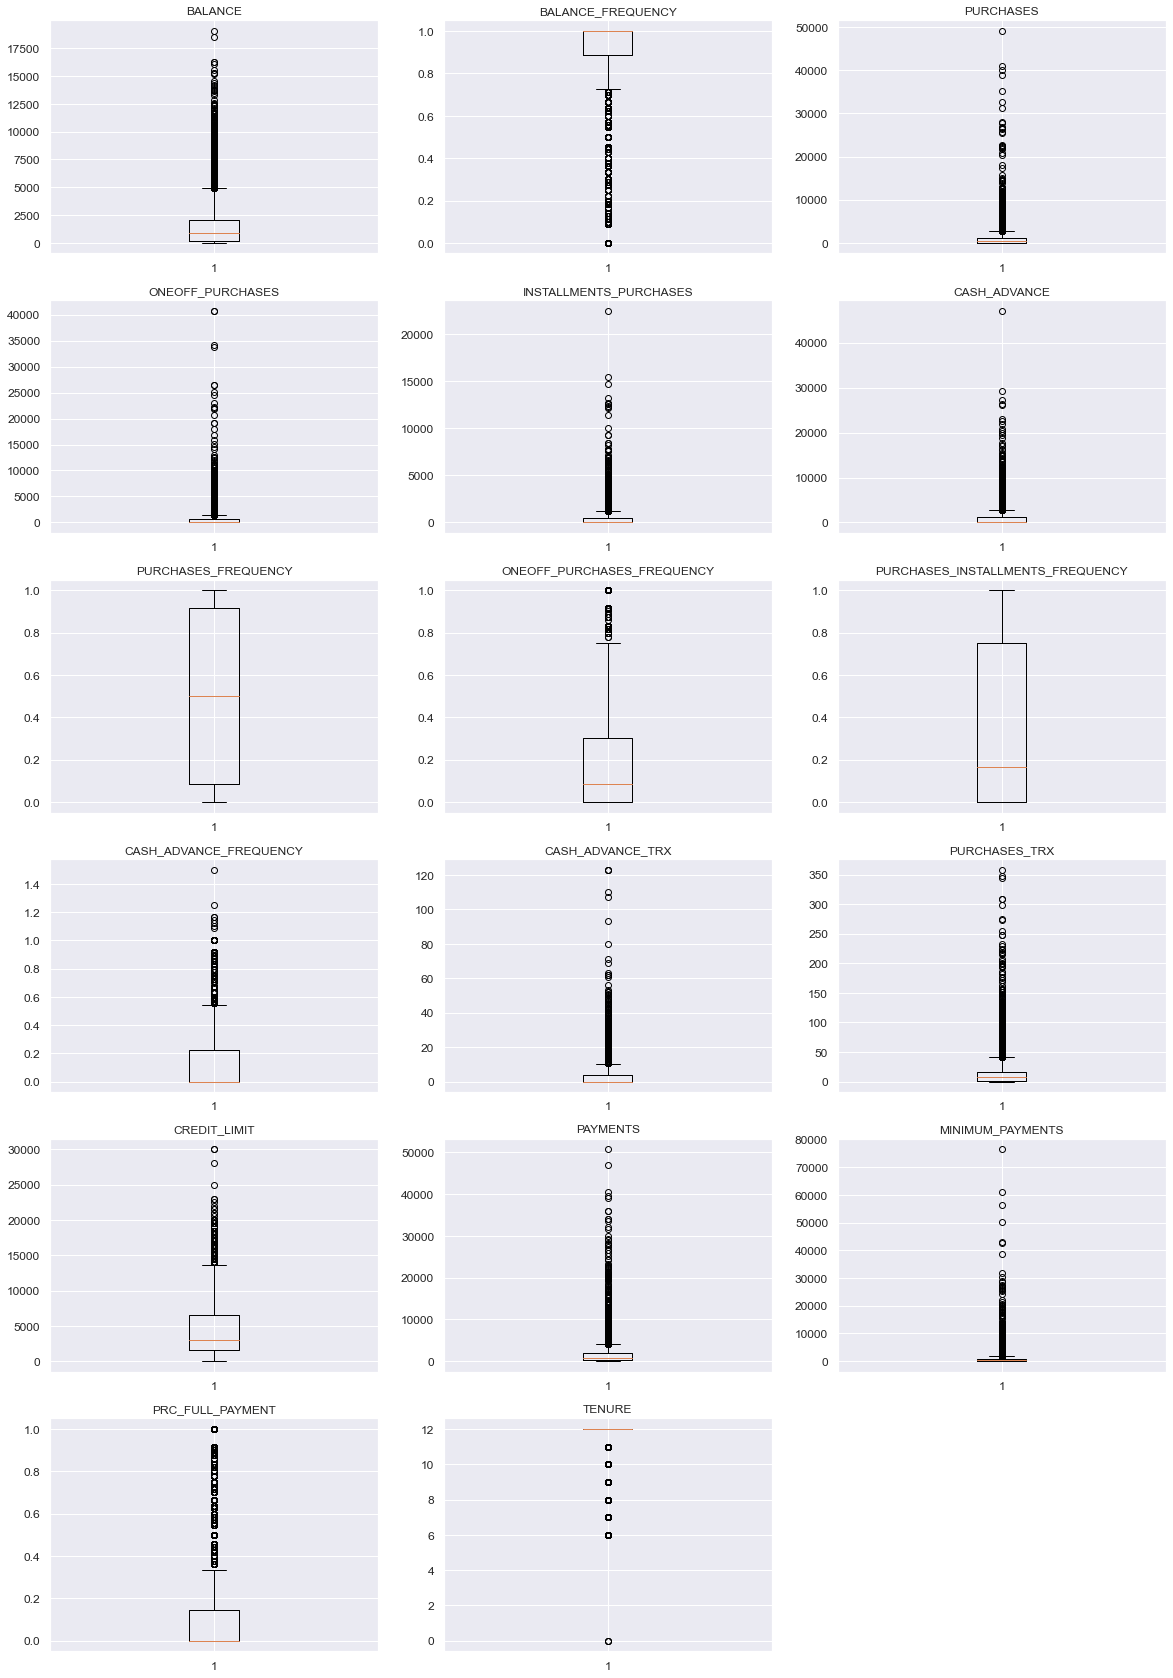

In [38]:
# Box plots for detecting outliers
plt.figure(figsize=(20,30))

for i in range(0,17):
    plt.subplot(6, 3, i+1)
    plt.boxplot(credit[Variables[i]])
    plt.title(Variables[i])

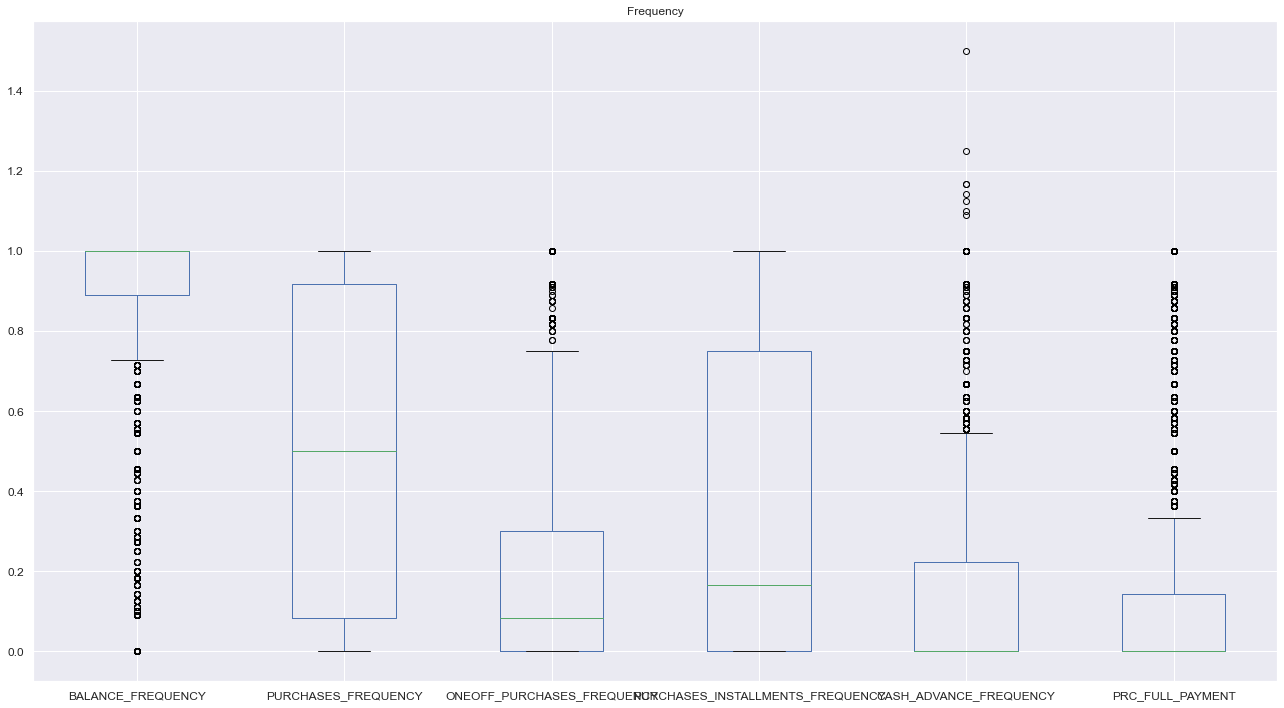

In [39]:
credit[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()

---
- Clearly, there are quite a few outliers present in the data. Hence, I will use logarithmic transformation to somewhat nullify the effect of those outliers.

In [40]:
# logarithmic Tranformation
df_log = credit.drop(['purchase_type'],axis=1).applymap(lambda x: np.log(x+1))
df_log

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Avg_amount_per_purchase,Avg_cash_advance_amount,limit_usage,payment_to_minpay
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,3.885679,0.000000,0.040086,0.894662
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,0.000000,7.385067,0.376719,1.574068
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,4.180994,0.000000,0.287197,0.688979
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,2.564949,4.835620,2.898616,7.313220,5.331694,0.200671,0.000000
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,2.833213,0.000000,0.519644,1.327360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,0.693147,5.677165,0.000000,5.677165,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,1.945910,3.902377,0.000000,3.902377,0.000000,0.028095,2.036042
8946,3.004851,0.693147,5.707110,0.000000,5.707110,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.623517,6.762968,0.000000,1.945910,3.931826,0.000000,3.931826,0.000000,0.019002,0.277031
8947,3.194529,0.606136,4.979489,0.000000,4.979489,0.000000,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,1.945910,3.221539,0.000000,3.397189,0.000000,0.023129,0.686161
8948,2.671218,0.606136,0.000000,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144,1.945910,0.000000,1.959127,0.000000,2.959037,0.026559,0.663978


---
### Insights from the KPIs

- Average payment_to_minpayment ratio for each purchase type.

In [41]:
x=credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_to_minpay']))
type(x)
x.values

array([13.2430956 , 10.0619187 ,  7.23117631,  5.49956535])

Text(0.5, 1.0, 'Mean payment_to_minpayment ratio for each purchase type')

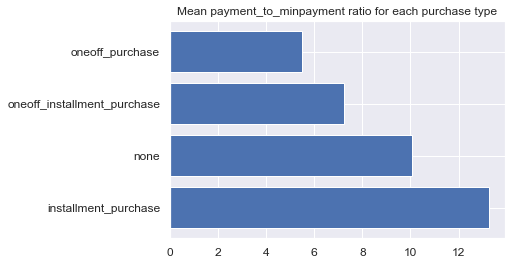

In [42]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_to_minpayment ratio for each purchase type')


In [43]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Avg_amount_per_purchase,Avg_cash_advance_amount,limit_usage,payment_to_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.466037,0.877078,1003.116994,592.437344,410.977374,978.871112,0.490220,0.202448,0.364316,0.135144,3.248827,14.709832,4492.438277,1729.807775,864.060373,0.153622,11.513296,86.167853,88.977984,73.870683,208.905117,0.388875,9.032347
std,2081.538346,0.237316,2136.664341,1659.887927,904.351154,2097.163877,0.401389,0.298341,0.397417,0.200121,6.824647,24.857649,3637.933088,2880.795440,2330.612923,0.292479,1.354807,180.511321,193.136115,160.524939,535.655517,0.389729,118.176855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.135000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.170944,170.803012,0.000000,12.000000,3.339542,0.000000,11.983437,0.000000,0.041450,0.906626
50%,873.385231,1.000000,361.035000,38.000000,88.980000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.468331,335.270722,0.000000,12.000000,31.906167,0.000000,41.393929,0.000000,0.302720,2.015549
75%,2054.140036,1.000000,1110.130000,577.405000,468.325000,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1900.459052,864.206542,0.142857,12.000000,97.228333,99.085196,78.662304,246.995017,0.717571,6.048293
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,5981.666667,14836.451410,15.909951,6840.528861


Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None, Installment, One_Off')

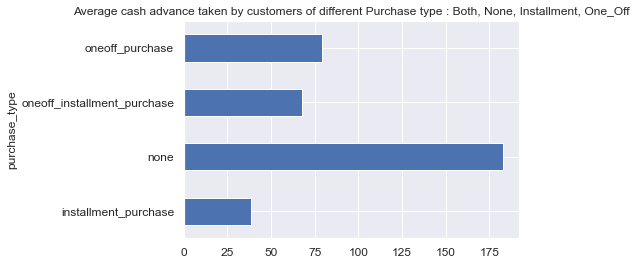

In [44]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None, Installment, One_Off')

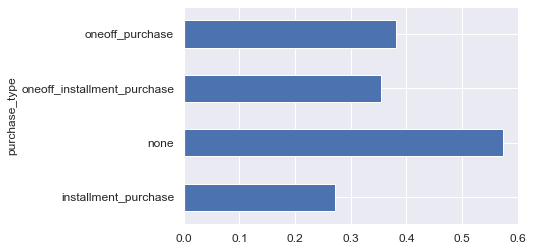

In [45]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

### Preparing Data for Machine Learning Algorithm

In [46]:
# Creating and merging dummy variables for the categorical column "purchase_type" with the dataframe.
credit_df = pd.concat([df_log, pd.get_dummies(credit['purchase_type'])],axis=1)
credit_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Avg_amount_per_purchase,Avg_cash_advance_amount,limit_usage,payment_to_minpay,installment_purchase,none,oneoff_installment_purchase,oneoff_purchase
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,3.885679,0.000000,0.040086,0.894662,1,0,0,0
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,0.000000,7.385067,0.376719,1.574068,0,1,0,0
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,4.180994,0.000000,0.287197,0.688979,0,0,0,1
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,2.564949,4.835620,2.898616,7.313220,5.331694,0.200671,0.000000,0,0,0,1
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,2.833213,0.000000,0.519644,1.327360,0,0,0,1


In [47]:
# Dropping the column "PURCHASES", since it is a combination of the columns "ONEOFF_PURCHASES" & "INSTALLMENTS_PURCHASES".
credit_df.drop("PURCHASES", axis=1, inplace=True)

In [48]:
credit_df.head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Avg_amount_per_purchase,Avg_cash_advance_amount,limit_usage,payment_to_minpay,installment_purchase,none,oneoff_installment_purchase,oneoff_purchase
0,3.735304,0.597837,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,3.885679,0.000000,0.040086,0.894662,1,0,0,0
1,8.071989,0.646627,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,0.000000,7.385067,0.376719,1.574068,0,1,0,0
2,7.822504,0.693147,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,4.180994,0.000000,0.287197,0.688979,0,0,0,1
3,7.419183,0.492477,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,2.564949,4.835620,2.898616,7.313220,5.331694,0.200671,0.000000,0,0,0,1
4,6.707735,0.693147,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,2.833213,0.000000,0.519644,1.327360,0,0,0,1


In [49]:
credit_df.shape

(8950, 26)

In [50]:
# Final Checking for NaN values
print("Presence of NaN values-", credit.isnull().values.any())

Presence of NaN values- False


In [51]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   ONEOFF_PURCHASES                  8950 non-null   float64
 3   INSTALLMENTS_PURCHASES            8950 non-null   float64
 4   CASH_ADVANCE                      8950 non-null   float64
 5   PURCHASES_FREQUENCY               8950 non-null   float64
 6   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 7   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 8   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 9   CASH_ADVANCE_TRX                  8950 non-null   float64
 10  PURCHASES_TRX                     8950 non-null   float64
 11  CREDIT_LIMIT                      8950 non-null   float64
 12  PAYMEN

Text(0.5, 1.0, 'Correlation Matrix')

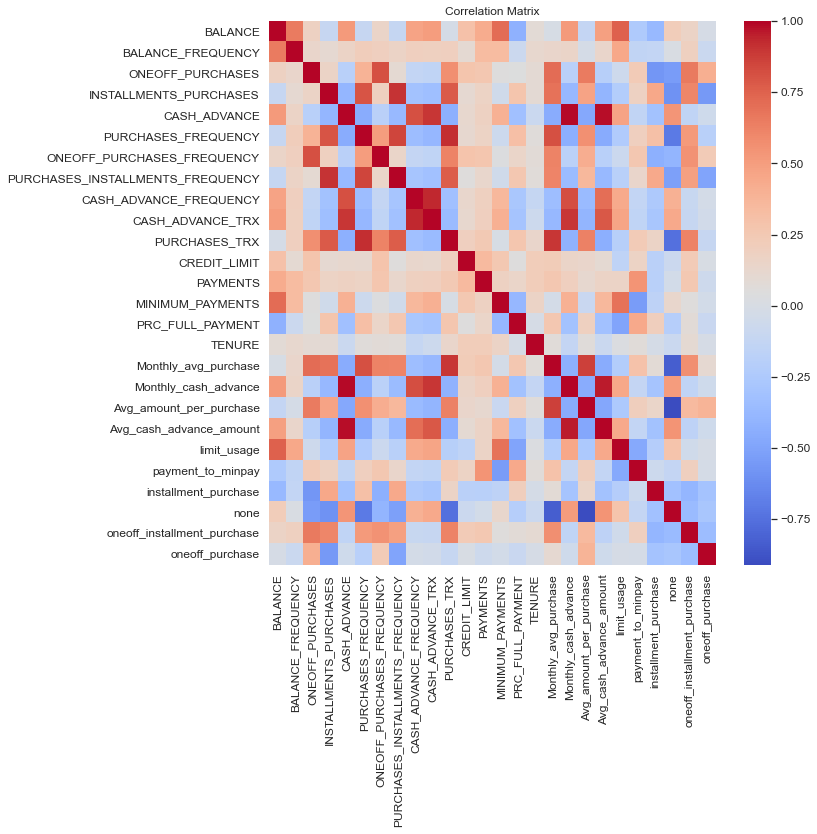

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(credit_df.corr(),cmap='coolwarm')

plt.title('Correlation Matrix')

---
### Feature Scaling

In [53]:
sc=StandardScaler()
df_scaled = sc.fit_transform(credit_df)

In [54]:
df_scaled

array([[-1.20376189, -0.14742143, -0.9870752 , ..., -0.54420787,
        -0.67019253, -0.51445133],
       [ 0.94846812,  0.18017024, -0.9870752 , ...,  1.83753316,
        -0.67019253, -0.51445133],
       [ 0.82465271,  0.49251947,  1.06202158, ..., -0.54420787,
        -0.67019253,  1.94381849],
       ...,
       [-1.47214015, -0.09170263, -0.9870752 , ..., -0.54420787,
        -0.67019253, -0.51445133],
       [-1.73185133, -0.09170263, -0.9870752 , ...,  1.83753316,
        -0.67019253, -0.51445133],
       [-0.11780627, -0.73164164,  1.16861769, ..., -0.54420787,
        -0.67019253,  1.94381849]])

In [55]:
df_scaled.shape

(8950, 26)

# C. Principal Component Analysis

In [56]:
var_ratio={}
for n in range(2,18):
    pc = PCA(n_components=n)
    credit_pca = pc.fit(df_scaled)
    var_ratio[n]=sum(credit_pca.explained_variance_ratio_)

In [57]:
var_ratio

{2: 0.5251568450382667,
 3: 0.6318647841704962,
 4: 0.7155651452779277,
 5: 0.7714432199037886,
 6: 0.8207142294288816,
 7: 0.8601500210568304,
 8: 0.8891302913731028,
 9: 0.9140007134692585,
 10: 0.9338374067178775,
 11: 0.9507628477516569,
 12: 0.9656313185635158,
 13: 0.9742769648102417,
 14: 0.9808602500463786,
 15: 0.9860044534220503,
 16: 0.9893482921225798,
 17: 0.9921247111181632}

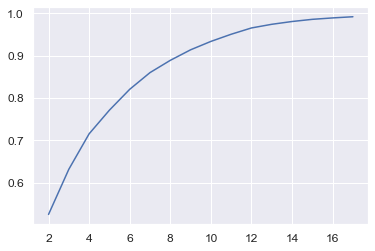

In [58]:
pd.Series(var_ratio).plot()

From the above observation, it is clear that about 90% of the variance is explained by 8 components. 

In [59]:
pc = PCA(n_components=8)
p = pc.fit(df_scaled)
p.explained_variance_

array([8.8299136 , 4.82569014, 2.77471644, 2.17645257, 1.45299229,
       1.2811894 , 1.02544516, 0.75357123])

In [60]:
np.sum(p.explained_variance_)

23.119970812414287

In [61]:
pc_final = PCA(n_components=8).fit(df_scaled)

df_PCA = pc_final.fit_transform(df_scaled)

In [62]:
df = pd.DataFrame(df_PCA)

In [63]:
df.head()

,0,1,2,3,4,5,6,7
0,-0.873315,3.370317,-0.682944,-0.958717,0.122564,-0.383721,0.033899,0.860466
1,4.827094,-0.471930,-0.348673,1.651829,-1.220178,-0.796587,-0.246279,-0.671849
2,-1.604980,-1.080551,2.908095,-2.054394,-0.579374,-0.686369,0.020345,-1.300445
3,0.875365,0.384261,2.816785,-2.737085,2.315681,0.105136,-2.592004,-0.610102
4,0.620141,1.620816,2.050672,-1.949784,-1.061078,-0.700992,1.435090,0.729410


In [64]:
df.shape

(8950, 8)

Hence, the dimension has been reduced to (8950, 8) from (8950, 26)

In [65]:
col_list=credit_df.columns
col_list

Index(['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance',
       'Avg_amount_per_purchase', 'Avg_cash_advance_amount', 'limit_usage',
       'payment_to_minpay', 'installment_purchase', 'none',
       'oneoff_installment_purchase', 'oneoff_purchase'],
      dtype='object')

In [66]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(8)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
BALANCE,0.138625,-0.348844,-0.049168,-0.174742,-0.156104,-0.100857,0.137459,-0.132540
BALANCE_FREQUENCY,0.020089,-0.258746,-0.127162,-0.147329,-0.229375,-0.108416,0.465924,-0.213060
ONEOFF_PURCHASES,-0.160913,-0.271091,0.356515,-0.027400,0.021812,0.171067,-0.034354,0.068995
INSTALLMENTS_PURCHASES,-0.245019,-0.110036,-0.352967,0.059460,0.046449,0.069167,-0.091415,0.079972
CASH_ADVANCE,0.272144,-0.186969,-0.055890,0.162298,0.214497,0.011587,-0.052727,0.085604
PURCHASES_FREQUENCY,-0.273956,-0.149616,-0.182999,-0.002504,0.114714,0.033303,0.068902,-0.052970
ONEOFF_PURCHASES_FREQUENCY,-0.156251,-0.253524,0.262234,0.037944,-0.059271,0.184840,0.044487,-0.122830
PURCHASES_INSTALLMENTS_FREQUENCY,-0.228892,-0.094628,-0.374333,0.038351,0.056400,0.059807,-0.011430,0.034103
CASH_ADVANCE_FREQUENCY,0.230768,-0.194080,-0.055922,0.142422,0.271123,-0.009117,-0.003580,0.029763
CASH_ADVANCE_TRX,0.248768,-0.202720,-0.061599,0.145111,0.251423,-0.014609,-0.037045,0.088414


# D. K-Means Clustering

In [67]:
df_PCA

array([[-0.87331475,  3.37031747, -0.68294449, ..., -0.38372085,
         0.03389859,  0.86046637],
       [ 4.82709431, -0.47193019, -0.34867276, ..., -0.79658679,
        -0.24627862, -0.67184941],
       [-1.60498028, -1.08055066,  2.90809474, ..., -0.68636946,
         0.02034519, -1.30044536],
       ...,
       [-1.9726789 ,  3.57167501, -1.63121628, ...,  1.85449457,
         1.87973423, -1.9470764 ],
       [ 2.79729257,  4.26822706,  0.23897657, ...,  3.57830951,
         2.1559133 , -1.5809828 ],
       [ 0.16264326, -0.03748047,  2.65344147, ...,  2.62110234,
         1.73348145, -1.39205866]])

---
### Determining the value of K

#### a. Elbow Method

In [68]:
wcss = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(df_PCA)
    wcss.append(kmeans.inertia_)

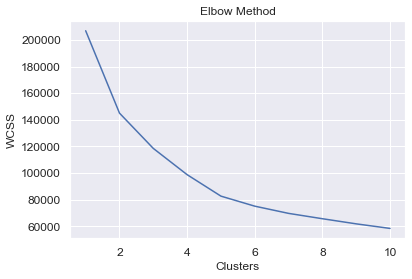

In [69]:
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

#### b. Silhouette Scores

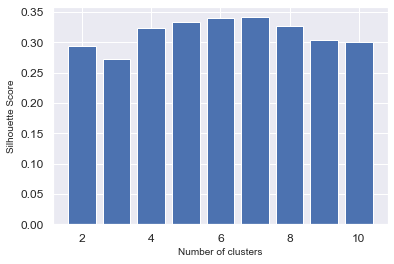

In [70]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df_PCA, KMeans(n_clusters = n_cluster).fit_predict(df_PCA))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

---
- With the help of both elbow method and silhouette scores, I am taking the number of clusters, i.e., K = 5

In [71]:
cluster = KMeans(n_clusters=5,random_state=123)
cluster.fit(df_PCA)
cluster.labels_

array([4, 0, 2, ..., 4, 0, 2])

In [72]:
pd.Series(cluster.labels_).value_counts()

0    2060
4    1904
1    1880
3    1721
2    1385
dtype: int64

In [73]:
df_cluster_PCA = pd.DataFrame(df_PCA,columns=['PC_' +str(i) for i in range(8)])
df_cluster_PCA['Cluster'] = cluster.labels_ #Add cluster column in the data frame
df_cluster_PCA.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,Cluster
0,-0.873315,3.370317,-0.682944,-0.958717,0.122564,-0.383721,0.033899,0.860466,4
1,4.827094,-0.471930,-0.348673,1.651829,-1.220178,-0.796587,-0.246279,-0.671849,0
2,-1.604980,-1.080551,2.908095,-2.054394,-0.579374,-0.686369,0.020345,-1.300445,2
3,0.875365,0.384261,2.816785,-2.737085,2.315681,0.105136,-2.592004,-0.610102,2
4,0.620141,1.620816,2.050672,-1.949784,-1.061078,-0.700992,1.435090,0.729410,2


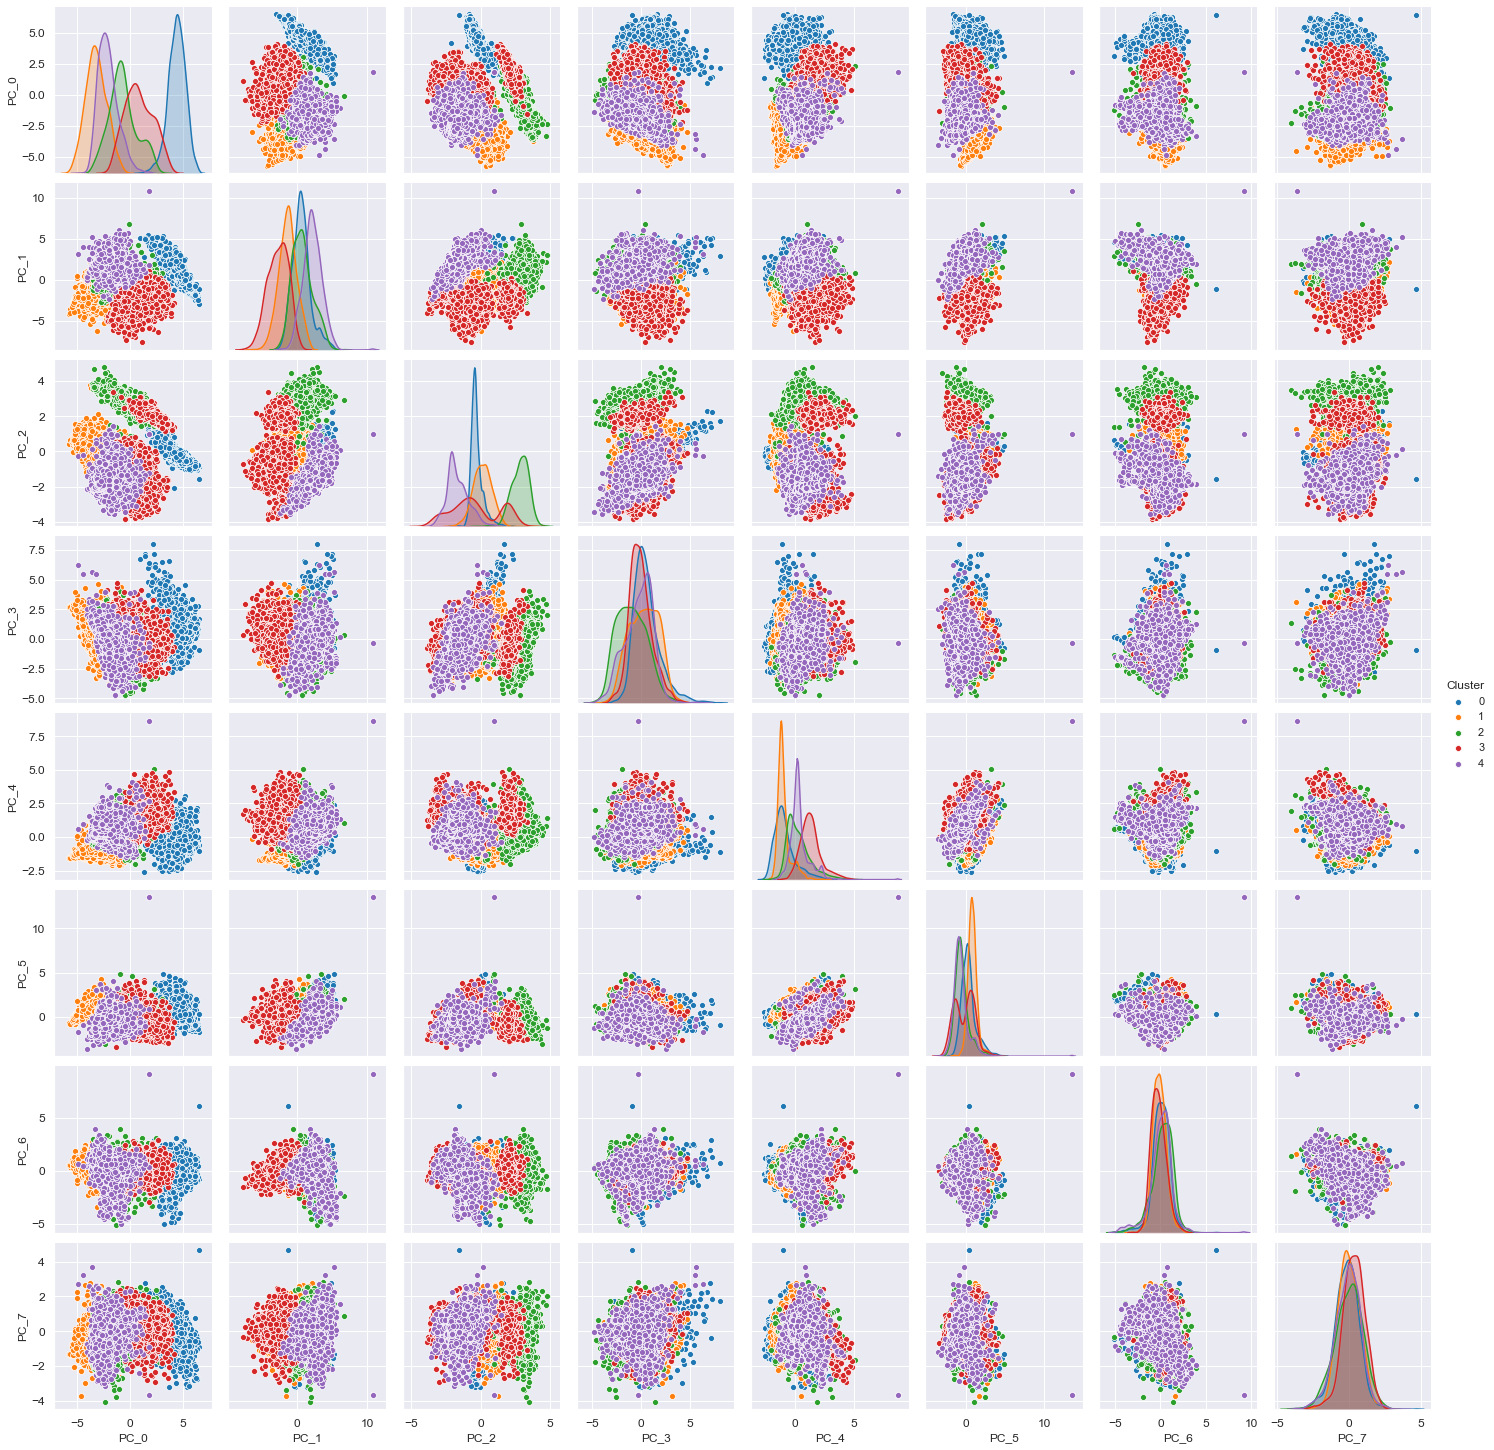

In [74]:
#pairwise relationship of components on the data
sns.pairplot(df_cluster_PCA, hue='Cluster', palette= 'tab10', diag_kind='kde')

---
- Till now I have carried out cluster analysis based on the components derived from Principal Component Analysis. Now I will merge the clusters with the original dataframe and carry out further analysis.

---
- Now I will be using the KPIs for the purpose. Since there are large number of variables in the original data, leveraging all those variables for Clustering might become difficult to interpret the result. Moreover, I will also add some other important variables based on my intuition.

In [75]:
KPI_col = ['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_to_minpay','oneoff_installment_purchase','installment_purchase','oneoff_purchase','none','CREDIT_LIMIT']

In [76]:
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Avg_amount_per_purchase,Avg_cash_advance_amount,limit_usage,payment_to_minpay,installment_purchase,none,oneoff_installment_purchase,oneoff_purchase
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.160851,0.619793,3.204250,3.351116,3.319086,0.361172,0.158690,0.269985,0.113512,0.817570,1.894731,8.092137,6.622096,5.949801,0.117653,2.518820,3.050149,2.163970,3.149057,2.648058,0.296073,1.353267,0.252291,0.228492,0.309944,0.209274
std,2.015086,0.148944,3.246388,3.083151,3.566298,0.277341,0.216677,0.281838,0.156716,1.009316,1.373856,0.832687,1.595819,1.184399,0.211595,0.138284,2.003310,2.429741,1.883532,2.841407,0.250311,0.941019,0.434351,0.419884,0.462496,0.406813
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951088,5.146349,0.000000,2.564949,1.467769,0.000000,2.563674,0.000000,0.040614,0.645335,0.000000,0.000000,0.000000,0.000000
50%,6.773521,0.693147,3.663562,4.499587,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.753984,5.817916,0.000000,2.564949,3.493660,0.000000,3.747005,0.000000,0.264455,1.103782,0.000000,0.000000,0.000000,0.000000
75%,7.628099,0.693147,6.360274,6.151295,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550377,6.762968,0.133531,2.564949,4.587295,4.606022,4.377796,5.513409,0.540911,1.952785,1.000000,0.000000,1.000000,0.000000
max,9.854515,0.693147,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,8.696622,9.604910,2.827902,8.830767,1.000000,1.000000,1.000000,1.000000


In [77]:
# Conactenating labels found through Kmeans with data 
df_cluster_original = pd.concat([credit_df[KPI_col],pd.Series(cluster.labels_,name='Clusters')],axis=1)

In [78]:
df_cluster_original.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_to_minpay,oneoff_installment_purchase,installment_purchase,oneoff_purchase,none,CREDIT_LIMIT,Clusters
0,1.098612,2.191654,0.000000,0.040086,0.000000,0.894662,0,1,0,0,6.908755,4
1,0.000000,0.000000,6.287695,0.376719,1.609438,1.574068,0,0,0,1,8.853808,0
2,2.564949,4.180994,0.000000,0.287197,0.000000,0.688979,0,0,1,0,8.922792,2
3,0.693147,4.835620,2.898616,0.200671,0.693147,0.000000,0,0,1,0,8.922792,2
4,0.693147,0.847298,0.000000,0.519644,0.000000,1.327360,0,0,1,0,7.090910,2


In [79]:
# Mean value gives a good indication of the distribution of data. I am deriving mean value for each variable for each cluster
clusters = df_cluster_original.groupby('Clusters').apply(lambda x: x[KPI_col].mean()).T
clusters

Clusters,0,1,2,3,4
PURCHASES_TRX,0.006787,3.252766,1.605567,2.477557,2.279975
Monthly_avg_purchase,0.004229,4.889593,3.480053,4.017040,3.342693
Monthly_cash_advance,4.471293,0.237760,0.724572,4.921139,0.124406
limit_usage,0.427619,0.205081,0.227935,0.464642,0.140790
CASH_ADVANCE_TRX,1.648803,0.076164,0.244744,1.954411,0.039400
payment_to_minpay,1.136913,1.846582,1.388115,1.122984,1.283053
oneoff_installment_purchase,0.000000,0.998936,0.009386,0.497966,0.013655
installment_purchase,0.002913,0.000000,0.000000,0.219059,0.984769
oneoff_purchase,0.005825,0.001064,0.990614,0.282975,0.000000
none,0.991262,0.000000,0.000000,0.000000,0.001576


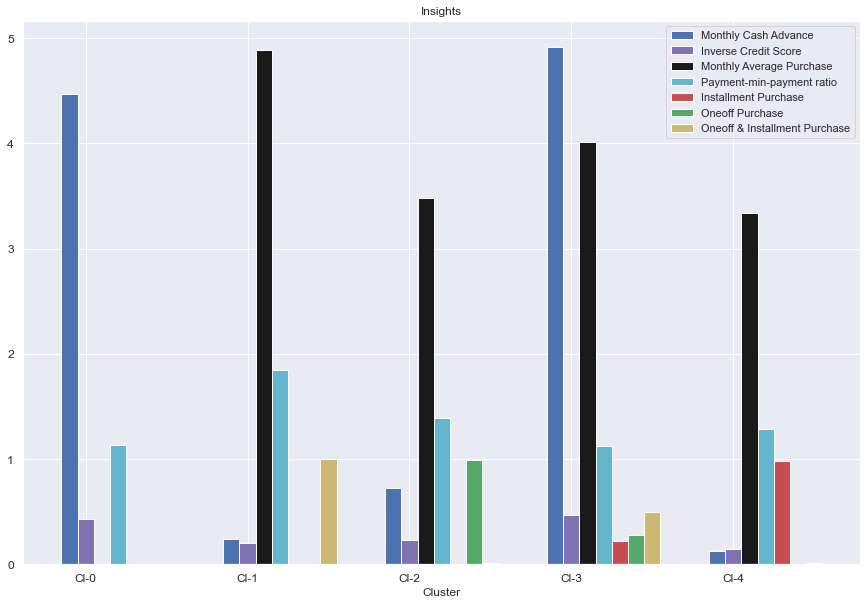

In [82]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(clusters.columns))

cash_advance=(clusters.loc['Monthly_cash_advance',:].values)
inverse_credit_score=(clusters.loc['limit_usage',:].values)
purchase= (clusters.loc['Monthly_avg_purchase',:].values)
payment=clusters.loc['payment_to_minpay',:].values
installment=clusters.loc['installment_purchase',:].values
one_off=clusters.loc['oneoff_purchase',:].values
both = clusters.loc['oneoff_installment_purchase',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly Cash Advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Inverse Credit Score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Monthly Average Purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-min-payment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='Installment Purchase',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='Oneoff Purchase',width=bar_width)
b7=plt.bar(index+6*bar_width,both,color='y',label='Oneoff & Installment Purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3', 'Cl-4'))
plt.legend()

In [83]:
# Percentage of each cluster in the total customer base
s = df_cluster_original.groupby('Clusters').apply(lambda x: x['Clusters'].value_counts())
print(s)

print('\n')

percentage = pd.Series((s.values.astype('float')/ df_cluster_original.shape[0])*100,name='Percentage')
print ("Clusters"),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),percentage],axis=1))

Clusters   
0         0    2060
1         1    1880
2         2    1385
3         3    1721
4         4    1904
Name: Clusters, dtype: int64


Clusters
   Size  Percentage
0  2060   23.016760
1  1880   21.005587
2  1385   15.474860
3  1721   19.229050
4  1904   21.273743


---
# E. Strategic Insights based on the 5 Clusters


- **Cluster 0** shows very high cash-advance transactions per month but very low credit score **(since, higher the limit_usage/Inverse Credit Score lower the credit score)**. Moreover, no customers are doing any kinds of purchases (oneoff, installment and both). **This group is about 23% of the total customer base.**



- **Cluster 1** shows very low cash-advance transactions per month, customers are doing both oneoff and installment purchases combined. Credit Score is comparatively high. **This group is about 21% of the total customer base.**



- **Cluster 2** shows relatively low cash-advance transactions per month, moderately high credit score and moderately high payment ratio. Moreover, this group contains maximum number of customers who are doing only oneoff purchases and zero installment purchases. **This group is about 16% of the total customer base.** 


- **Cluster 3** has the highest cash-advance transactions per month and the payment ratio is moderately high. Moreover, it also shows lowest credit score. In this group, customers are also doing both kinds of purchases (oneoff and installment). **This group is about 19% of the total customer base.**



- **Cluster 4** consists of the group of customers having the lowest cash-advance transactions per month but highest credit score. It also captures the maximum number of installment purchases and zero oneoff purchases. Moreover, the payment ratio is moderately high  **This group is about 21% of the total customer base.**

---
# F. Implementation of Strategies from the above Insights
   
**a. Group 0**
- This group of cutomers have a poor credit score as well as very high cash-advance transactions per month. Moreover, there are no signs of any kinds of purchases. This group seems quite risky.

**b. Group 1**
- This group of customers are maintaining a pretty good credit score and very low monthly cash-advance transactions. Moreover, they are also doing large number of installment and oneoff purchases combined. We can focus on this group of customers by providing less interest rate on purchase transactions so as to increase the revenue of the credit card company.
  
**c. Group 2**
- This group of customers are maintaining a moderately good credit score and the the cash-advance transactions per month is quite low. Also, this group of customers are carrying out the highest number of one-off purchases. Giving reward points for such purchase transactions might encourage them to carry out more such transactions, thereby increasing the revenue of the credit card company.

**d. Group 3**
- In this group, the customers have a poor credit score. Moreover, the number of monthly cash-advance transactions are also the highest. However, they are carrying out different kinds of purchase transactions (onoff, installment & both). This group is also a risky one but they can also be given reward points to increase the number of transactions.

**e. Group 4**
- They are the potential target customers for increasing the revenue of the credit card company to its fullest as this group of customers have the best credit score as well as lowest cash-advance transactions. They are also doing large number of installment purchases. We can target them by providing less interest rate on purchase transactions.